In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('libraries imported')

libraries imported


In [ ]:
# importing data from remote link
df = pd.read_csv('/content/Iris.csv')
print("Data imported successfully")
df.head(151)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Shape of dataset
df.shape

(150, 6)

In [ ]:
# For insight of data in column
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
# Getting unique values of species
df['Species'].nunique()

3

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Removing duplicates from the dataset
pd.DataFrame.drop_duplicates(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=df['Species'].values

In [ ]:
df.drop('Species',axis=1,inplace=True)
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**VISUALIZING THE DATASET**

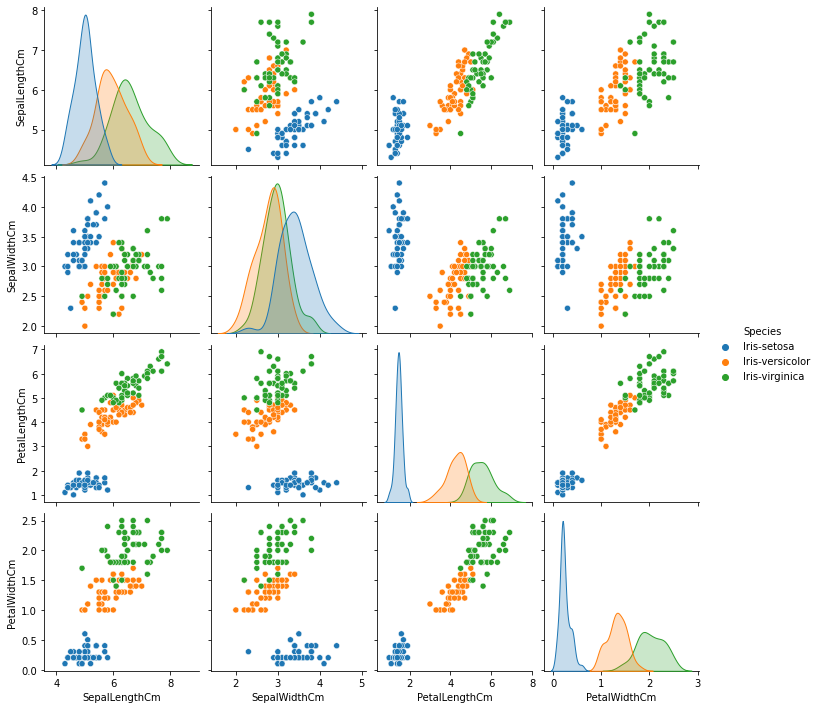

In [ ]:
sns.pairplot(df,hue="Species")
plt.show()

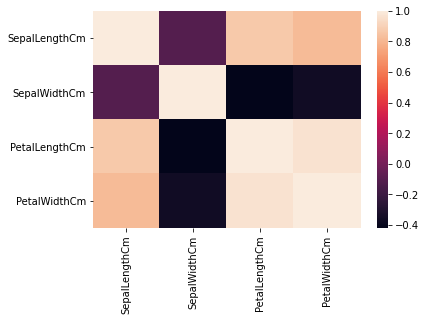

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# finding the optimum number of clusters for K-Means classification
X=df.iloc[: , [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]   # within cluster sum of squares
for i in range(1,15):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init=10,random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


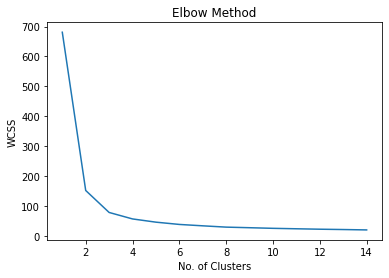

In [ ]:
#plotting the graph
plt.plot(range(1,15),wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans=KMeans(n_clusters= 3, init='k-means++',max_iter=300,n_init=10,random_state=42)
y_kmeans=kmeans.fit_predict(X)

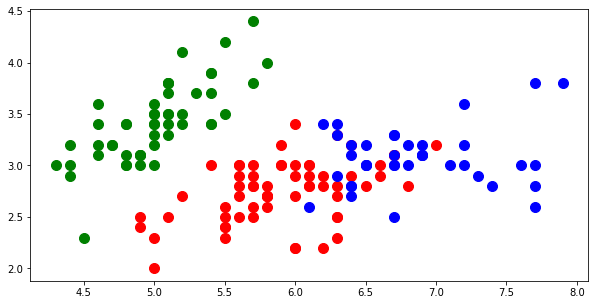

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],
            s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],
            s=100,c='green',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],
            s=100,c='blue',label='Iris-virginica')

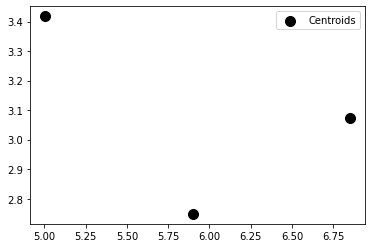

In [ ]:
# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=100,c='black',label='Centroids')
plt.legend()

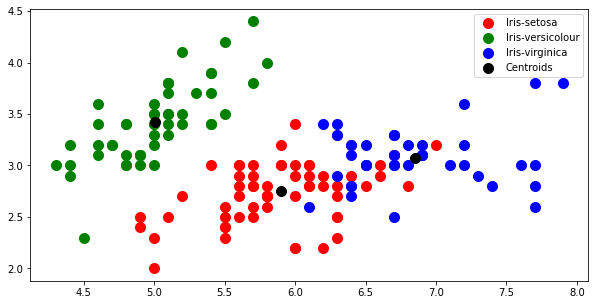

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],
            s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],
            s=100,c='green',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],
            s=100,c='blue',label='Iris-virginica')
# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=100,c='black',label='Centroids')
plt.legend()